# This is the template for coursework B - Add a suitable title

<div class="alert alert-block alert-danger">
<b>Candidate number: Your candidate number here (this is a five digit number). </b>

- This Coursework contributes <b>80%</b> to your overall unit mark.

- Will be marked anonymously.

- Keep to word limits (+- a few words).

- You can use the WordCounter notebook to check your word count.

- Code & figure captions do not count towards word limits.
</div>

### Abstract: 

Here, give an overview of your work, make sure to describe the science background, methods, results as well as comparisons to literature data. Keep this short.
<div class="alert alert-block alert-danger">

Planets found for the Unkown system with the following periods. A convolution nural network developed to demonstrate the uses of Machine Learning in Exoplanet detection train on sythentic data demonstrates the difficulty with the applications of such a method. It will be presented that while there is difficulties in using a nural network for exoplanet detection, it deserves further exploring and a combination of a trained model with manual detection could prove fruitful in finding more planets. A current issue with transit detection is the selection bias towards big planets with low periods[], Classificalion using a Convolution nural netwrok will assist in finding planets with a larger period as a train model does not have the overhead of (FIND OVERHEAD) scaling as period increases.

<b>word limit 250 words.</b>

#### Imports: give all your imports in a box here. Any custom code you have stored in a .py file needs to be submitted with your coursework. You can freely use all code provided to you as part of this course. If you use code not encountered in the course, give a link to the online repo.

In [2]:
import transitFinderFunctions as tff
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(tff)

<module 'transitFinderFunctions' from '/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py'>

<div class="alert alert-block alert-danger">
<b>Make sure to include the relevant python files in your upload</b>

### 1. Introduction:

Give an introduction to your coursework. This should be a short description of exoplanets as well as a description of background relevant to your Discussion.

Your introduction should be understandable to a student having taken Intro to astro and Planets & Exoplanets. 

#### 1.1 Finding Transits in an Unkown system 


There are currently (X) Exoplanets discovered (X%) are Large with a small period,  The average size of these planets discovered is (X)[]. One particlar method of finding exoplanets is the transit method, this will be a periodic dip in a lightcurve corrosponding to whenever a planet passes infront of its hosts star. A Fourier Transform in the form of a lomb_scargle [] is applied to find the periodic nature of a given light curve, a second lomb_scargle is then performed on the produced output providing peaks where a periodic dip in the lightcurve is present.


##### 1.1.1 Lomb-Scargle analysis.

This does not find all planets, there is a selection bias towards larger planets with frequent periods, to try and negate this I have implemented an alogorithm in which the dataset is shuffled X time to get a list of X lightcurves, I will perform the first lomb scargle on these lightcurves, and then according to equation X I will have an adjusted output power, this adusted output power will have the 2nd lombscargle performed on it.

$$ P_{adjusted} = \sum_{i=1}^{N} (P-P_{shuffled}) $$

Where P is the power resulted from the lomb scargle. The Lomb-Scargle itself defined as






<div class="alert alert-block alert-danger">
<b>Word limit: 600 words</b>

### 2. Results - Modelling of Kepler lightcurve

$\bullet$ describe fitting of transit depths and present results with errors

$\bullet$ describe periodogram and identification of periodic features in lightcurves

$\bullet$ describe motivation for any additional fitting you have done

$\bullet$ include code for all modelling in attached code or inline, describe limitations and assumptions made

<div class="alert alert-block alert-danger">
    
<b>Keep this concise: word limit 500 words</b>

As seen in the code block below the data is read from the fits files, and then the lomb scargle is performed. 

In [ ]:
#Load the data and the shuffled data into dataframes.
file_path = 'CourseworkData/Objectlc'
kepler_dataframe = tff.loadDataFromFitsFiles(file_path,'medfilt')
kepler_dataframe_shuffled = tff.getRandomisedData(file_path,2000,'medfilt')


# Defining the period range.
period_range = (1 ,50)


#Perform the Lomb-Scargle periodogram
peaks_of_lightcurve_no_shuffled = tff.run_lomb_scargle_analysis(
      kepler_dataframe,
      resolution=80000,
      period_range=period_range,
      power_filter = 0.05*(10**-11))

#Perform the Lomb-Scargle periodogram with the shuffled data 
peaks_of_lightcurve_adjusted = tff.run_lomb_scargle_analysis(
      kepler_dataframe,
      resolution=80000,
      period_range=period_range,
      list_of_random_lightcurves=kepler_dataframe_shuffled,
      different=True,
      power_filter = 0.05*(10**-11))





### 3. Discussion

$\bullet$ present comparison of your results with data, including statistical analyis and clear figures. 

$\bullet$ limit yourself in the presentation of results, focus on fewer results that are described well, rather than presenting many figures without clear context

$\bullet$ Include a short (~ 200 word) description of a follow-up observations that would address an open question in your report.

You can add subsections in your discussion like this.

#### 3.1. Exoplanet 1

##### 3.1.1. Habitability of Exoplanet 1


#### 3.1 obtaining the dataset 

SOME DISCUSSION ON THE PLANETS

<h3 align="center"> 3.2. Generating Synthetic Dataset </h3>

PRETEXT

##### 3.2.1 Random Planetary System Generation

A Synthetic dataset has been generated to allow for training of the convolution nural network, scripting for it can be found in X, it creates the lightcurves for a system by varing the following properties. The position of the planet is calcualted from ethier varing or enerating the following parameters. Orbital Period, 
   $$
   P \sim \text{Uniform}(1, 50),
   $$
This defines the range of periods the model will be trained on, 
   $$
   R_p \sim \text{Uniform}(0.0001, 0.05) .
   $$
The semi major axis can then be caculated from the period,
   $$
   a = P^{2/3}.
   $$
The generator allows for the inclination to be set to any value, but edge on detection is assumed, this is something that can be varied in future iterations.
   $$
   i = \frac{\pi}{2}
   $$
The transit midpoint, t_0, is defined as,
   $$
   t_0 \sim \text{Uniform}(0, P).
   $$
And the limb darked coefficents are defined as,
   $$
   \begin{align*}
   u_1 &\sim \text{Uniform}(0.1, 1) \\
   u_2 &\sim \text{Uniform}(0.0, 0.5)
   \end{align*}
   $$
With a further restriction placed that 
   $$
   u_1 + u_2 < 1
   $$ 

#### 3.2.1 Position Calculations

The position of a planet in its orbit is calculated, first by finding the mean anomaly, 

   $$
   M = 2 \pi \frac{(t - t_0)}{P}
   $$
where, $M$ is the mean anomaly , #t#  is the current time, #t_0# is the transit midpoint and #P# is the orbital period. Most of exoplanets that have the potential to be catagories this way will have highly circular orbits, furthermore with the amount of calcualtions needed to generate the training data it is a good approimation to assume the true anomaly is simply the mean anomaly,

   $$
   \nu = M . 
   $$

The positions of the planets can then be calculated as,

   $$
   \begin{align*}
   x &= a (\cos(\nu) - 1) \\
   y &= a \sin(\nu) \cos(i) \\
   z &= a \sin(\nu) \sin(i)
   \end{align*}
   $$

where: $a$ is the semi-major axis and #i# is the inclination, for the purpose of this dataset edge-on detection is assumes and $i$ will be equal to $\frac{\pi}{2}$. The distance from the star can then be found from
   $$
   d = \sqrt{x^2 + y^2}
   $$

##### 3.2.2 Limb Darkened Light Curve Calculation

The distance is then normalised with respect ot the stellar radius 
   $$
   \mu = \sqrt{1 - \left(\frac{d}{R_*}\right)^2}
   $$
where:$d$ is the projected distance and $R_*$ is the star radius, a limb darkening effect is then applied,

   $$
   I(\mu) = 1 - u_1 (1 - \mu) - u_2 (1 - \mu)^2
   $$
   where:

And the final light curve is calcualted for each planet

   $$
   F_p = 1 - \left(\frac{R_p}{R_*}\right)^2 I(\mu)
   $$
Where $R_p$ is the planet radius and $F_p$ is the flux of the planet.

The complete light curve for the system with multiple planets is obtained by combining the light curves of all individual planets:

$$
F_{combined} = \prod_{i=1}^{N} F_i
$$

where:$F_i$ is the light curve of the \( i \)-th planet, and $N$ is the total number of planets in the system.

In order to make the data more akin to the provided dataset, random gaps of up to 40 days have been added to the dataset, without this consideration the model struggled with data without gaps, which is to be expected as prior all data did not have gaps.


<h3 align="center"> 3.3. The Convolution Nural Network </h3>

Using the synthetic data generated previously these can be fed into a Convolution nural network to train for period detection, the proposed input of the training data will be the lightcurve, number of detectable planets where a SNR threshold of,

$$
\text{SNR} = \frac{\max(|F - 1|)}{\sigma_{noise}}
$$
is applied, where $F$ is the lightcurve flux and $\sigma_{noise}$ is the noise of the dataset, this is used to apply a threshold of detectable planets. This will be done in an early effort to prevent overfitting and avoid training the model to detect physicsally undetecable planets. A threshold of 5 is chosen in accordance with litrature []   

#### 3.3.1 The loss function

The number of detectable planets, along with attached periods and the lightcurve is generated for 400,000 systems and stored in a hdf5 file, this is then trained on a convolution nural network as seen in Fig.X. Which is evaluated with a loss function of 

$$
Loss = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{1}{M_i} \sum_{j=1}^{M_i} (T_{ij} - P_{ij})^2 \right) + \frac{1}{N} \frac{\tilde{P}}{\tilde{n}}\sum_{i=1}^{N} (n_i - \hat{n}_i)^2 \\
$$

the subscript $i$ denotes for each lightcurve, and $j$ is for each detectable planet in the system, $M_i$ is the number of detectable periods, $T_{ij}$ is the perdicted period and $P_{ij} is the actual period. $n_i$ is the pericted amount of planets and $\hat{n}_i$ $N$ is defined as

$$
N = \text{batch size} * \text{length of input}
$$

The term 

$$
   \frac{\tilde{P}}{\tilde{n}}
$$

Is used to scale the loss in planet prediction to be simialr in scale to the loss in the period prediction, the $~$ represents the average value, for the generated dataset $\tilde{P} =25.5$ and $\tilde{n} = 5$

The parameters of the model have been tuned to allow computational efficency, however due to the size of the lightcurves GPU memeory provides a significant bottleneck, The model present in this report has been trained on an RTX 2070 super with 8Gb of vram, training on a large cluster or a GPU with a larger memory would lead to more oppertunites for complexity to be added to the model. 

Adam [] was picked for the optimiser with a learning rate of X, a typical learning rates of 1e-4 lead to the model overfitting.

#### 3.3.2 Overfitting 

Overfitting is worth of its own section in this report, due to the size of the convolution layers in comparison to the size of the models input significant iterations of the model had little varition on each input, the model would find the amount of planets to be approx 5,and would approximate all periods to be 25, these are the average of both of these inputs. and a local minima the model sometimes finds itself in, both of these values are consistently 'good enough'. The large dropout layer is the protection against this local minimun. this layer ignores half of the weights for each calculation, it forces the network to not become reliant on specific neurons and encouranges the network to distribute the information across many neurons making the network more robust.

#### 3.3.3 Demonstration of the model 

In the code block below, a random lightcurve is generated using the planet generator I have created, 

#### 3.3.4 The Model on real data 

The synthetic data has been generated to be comparable to the provided dataset, in the code block below it can be seen that the model does a bad job


<h3 align="center"> 3.4. Future improvements </h3>

There are 3 main improvements that could be made to improve the model

#### 3.4.1 Recursive nural network

Recursive nural networks are typically better for time series data, a refactored architecture of the model into a recursive nural network could lead to imroved predictions

#### 3.4.2 Fine tune on the kepler dataset

Fine tuning the model by using the kepler dataset and known planet transits could help the model deal with phenomons unique to real world data, that cannot be accurately represented by synthetic data. But considerations will need to be made, the kepler dataset lightcurves will have to be truncated or extended, a variable input could be used as an input [] but that is not a proven method and an while it has potential to improve the model this is not definite

#### 3.4.3 High powered computing time

The inital planned architecture of the model has been heavily scaled back due to memeory limitations 
This model has been trained on a NVIDA RTX 2070 Super 8GB, a larger GPU or even a GPU cluster would allow for more epochs, larger batches, more training data and oppertunties for a more complex architecture. While it is debateable if a more advanced model will always be better, it is my belief that due to the scale of the input, larger layers would signidicant increase the acccuracy of this model. 

<div class="alert alert-block alert-danger">
<b>Word limit: 1500 + 200 words.

Those focussing on more advanced data analysis can use part of their word count in results instead.</b>

$$
\begin{array}{c}
\text{Input Layer: (1, 1600 * (1/cadence))} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 1 channel} \\
\text{Output: 32 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 32 channels} \\
\text{Output: 64 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Convolutional Layer} \\
\text{Conv1d:} \\
\text{Input: 64 channels} \\
\text{Output: 128 channels} \\
\text{Kernel Size: 5} \\
\text{Padding: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Max Pooling Layer} \\
\text{MaxPool1d:} \\
\text{Kernel Size: 2} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 128 * 39151} \\
\text{Output: 256} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Dropout Layer} \\
\text{Dropout:} \\
\text{Probability: 0.5} \\
\hline
\end{array} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 256} \\
\text{Output: 1} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Number of Planets (scaled to 0-10)} \\
\downarrow \\
\begin{array}{|c|}
\hline
\text{Fully Connected Layer} \\
\text{Linear:} \\
\text{Input: 256} \\
\text{Output: 10} \\
\hline
\end{array} \\
\downarrow \\
\text{Predicted Periods (up to 10)} 
\end{array}
$$

### 4. Summary

$\bullet$ summarize your results. This can be done in text or bullet points.

<div class="alert alert-block alert-danger">
<b>Word limit: 300 words</b>

### References:

Give all references here. Use the [Harvard referencing style](https://library.bath.ac.uk/referencing/harvard-bath), as is customary in astrophysics.
- Miller & Jones, 2018, ApJ, 00, 000
- Smith et al. 2019, MNRAS, 00, 000
- Willow 1972, AJ, 00, 000

And cite these in the text as "Miller & Jones (2018) showed that all exoplanets are made of cheese, however, Smith et al. (2019) showed Trappist1b is made of chocolate, as previously suggested in the literature (Willow 1972)." 


### Acknowledgments

Acknowlegde the use of any software or datasets here.

### Example figure with caption

Below is example code to create a figure with a caption.

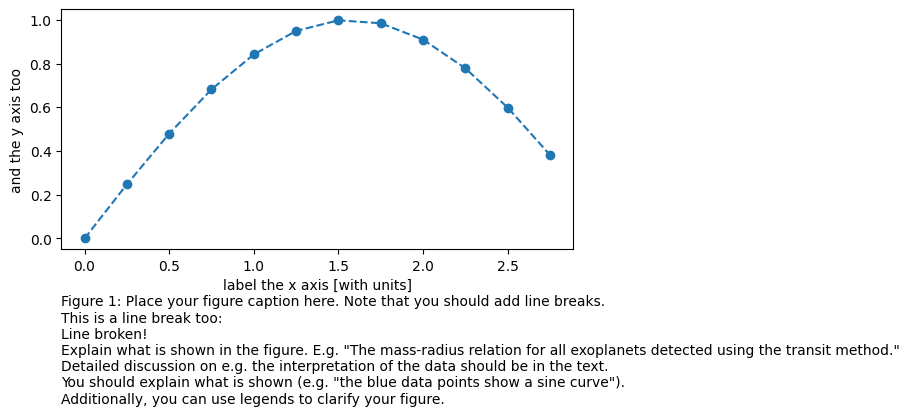

In [2]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(0,3,.25)
y = np.sin(x)
txt = '''Figure 1: Place your figure caption here. Note that you should add line breaks.
This is a line break too: \nLine broken!
Explain what is shown in the figure. E.g. "The mass-radius relation for all exoplanets detected using the transit method."
Detailed discussion on e.g. the interpretation of the data should be in the text.
You should explain what is shown (e.g. "the blue data points show a sine curve").
Additionally, you can use legends to clarify your figure.'''

fig = plt.figure()
ax1 = fig.add_axes((.1,.4,.8,.5)) # These numbers determine the location of the axes, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html
ax1.plot(x,y,ls='--', marker='o')
ax1.set_xlabel('label the x axis [with units]')
ax1.set_ylabel('and the y axis too')
fig.text(.1,.08,txt)
plt.show()

### Example table with caption

Below is an example how to display a table using [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html). 
More example code can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [3]:
import pandas as pd

df = pd.DataFrame({
    "Planet Name": ["Earth", "Mars", "Jupiter"],
    "Planet radius $[M_{\odot}]$": [1, 0.532, 10.973],
    "Albedo": [0.306, 0.25, 0.343], 
    "Planet Mass [10$^{24}$ kg]": [5.9722, 0.64169, 1898.13]
})

def make_pretty(styler):
    styler.set_caption("Table 1: Planet information. Explain what is shown in the table")
    styler.format(precision=3, thousands=",", decimal=".") ## this determines the formatting
    return styler

df.style.pipe(make_pretty)

,Planet Name,Planet radius $[M_{\odot}]$,Albedo,Planet Mass [10$^{24}$ kg]
0,Earth,1.000,0.306,5.972
1,Mars,0.532,0.250,0.642
2,Jupiter,10.973,0.343,"1,898.130"


### Finally, exporting your Coursework

Finally, create a html file of your coursework as follows. This removes the code boxes.

<div class="alert alert-block alert-danger">
<b>You will still need to submit the full notebook and associated code files.</b>

In [4]:
!jupyter nbconvert --to html --no-input Coursework_B_Template.ipynb

[NbConvertApp] Converting notebook Coursework_B_Template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 369108 bytes to Coursework_B_Template.html
